## Digits


In [209]:
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

file = "/Users/martin.iniguez/Desktop/master-thesis/opm-thesis/data/digits_epochs/freq_bands/all_data_all_epochs.pkl"

digits_epochs = pickle.load(open(file, "rb"))

# Assuming 'epochs' is your MNE epochs object
data = digits_epochs.get_data()
channel_names = digits_epochs.ch_names

# Replace these with the actual indices for X, Y, Z channels
x_indices = [digits_epochs.ch_names.index(ch) for ch in channel_names if "[X]" in ch]
y_indices = [digits_epochs.ch_names.index(ch) for ch in channel_names if "[Y]" in ch]
z_indices = [digits_epochs.ch_names.index(ch) for ch in channel_names if "[Z]" in ch]

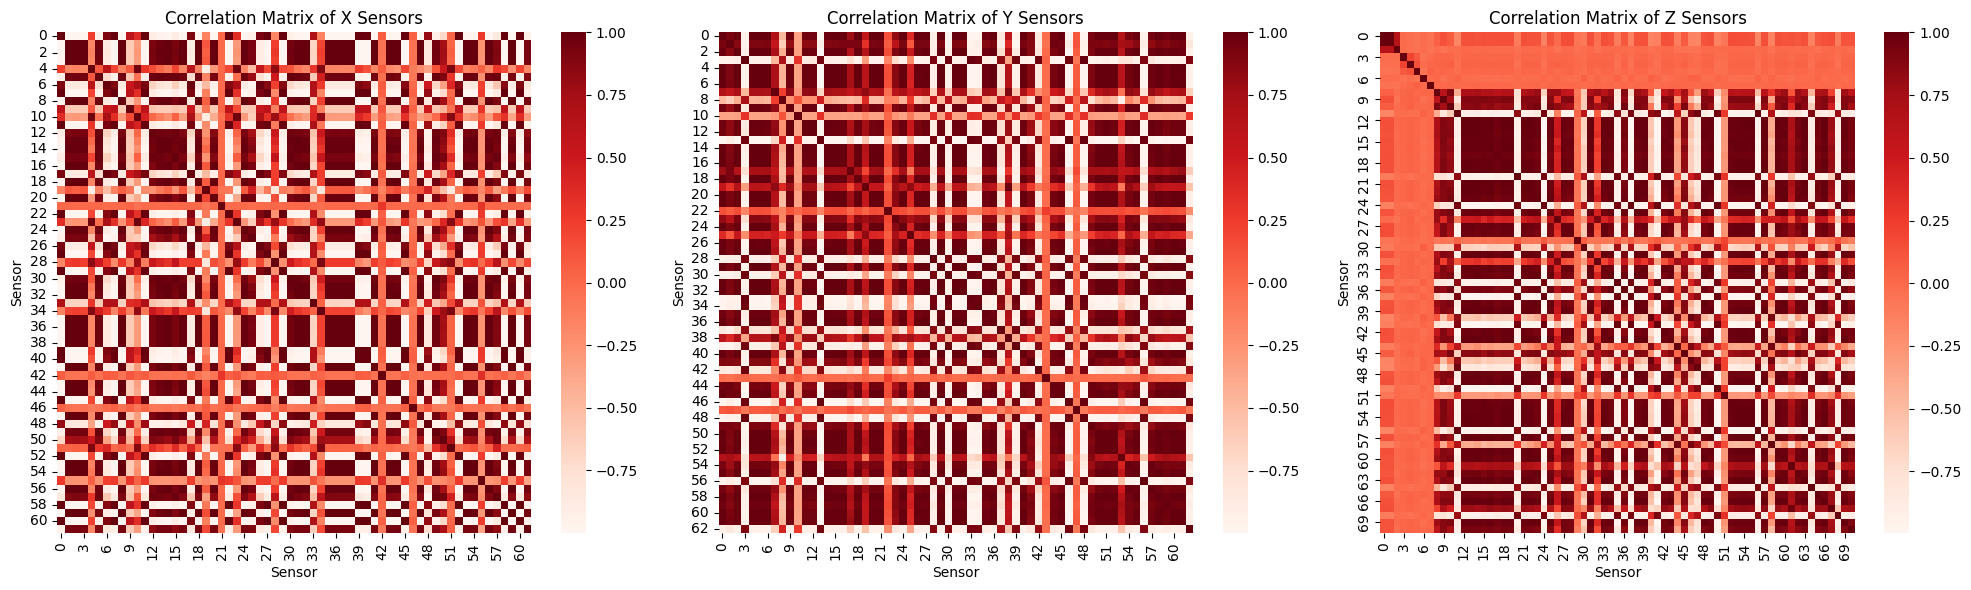

In [182]:
def plot_corr_matrix(x_data, y_data, z_data):
    # Compute correlation matrices
    corr_matrix_x = np.array([np.corrcoef(data) for data in x_data])
    corr_matrix_y = np.array([np.corrcoef(data) for data in y_data])
    corr_matrix_z = np.array([np.corrcoef(data) for data in z_data])

    # Plotting all three correlation matrices in the same row
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))

    sns.heatmap(corr_matrix_x[0], ax=axes[0], annot=False, cmap="Reds", cbar=True)
    axes[0].set_title("Correlation Matrix of X Sensors")
    axes[0].set_xlabel("Sensor")
    axes[0].set_ylabel("Sensor")

    sns.heatmap(corr_matrix_y[0], ax=axes[1], annot=False, cmap="Reds", cbar=True)
    axes[1].set_title("Correlation Matrix of Y Sensors")
    axes[1].set_xlabel("Sensor")
    axes[1].set_ylabel("Sensor")

    sns.heatmap(corr_matrix_z[0], ax=axes[2], annot=False, cmap="Reds", cbar=True)
    axes[2].set_title("Correlation Matrix of Z Sensors")
    axes[2].set_xlabel("Sensor")
    axes[2].set_ylabel("Sensor")

    plt.tight_layout()
    plt.show()

    return corr_matrix_x, corr_matrix_y, corr_matrix_z


def extract_significant_correlations(corr_matrix, threshold):
    # Using a list comprehension and np.triu_indices to get the upper triangle index pairs, excluding the diagonal
    significant_pairs = [
        [i, j, corr_matrix[i, j]]
        for i, j in zip(*np.triu_indices_from(corr_matrix, k=1))
        if np.abs(corr_matrix[i, j]) > threshold
    ]
    return significant_pairs

# Separate the data
x_data = data[:, x_indices, :]
y_data = data[:, y_indices, :]
z_data = data[:, z_indices, :]

corr_matrix_x, corr_matrix_y, corr_matrix_z = plot_corr_matrix(x_data, y_data, z_data)

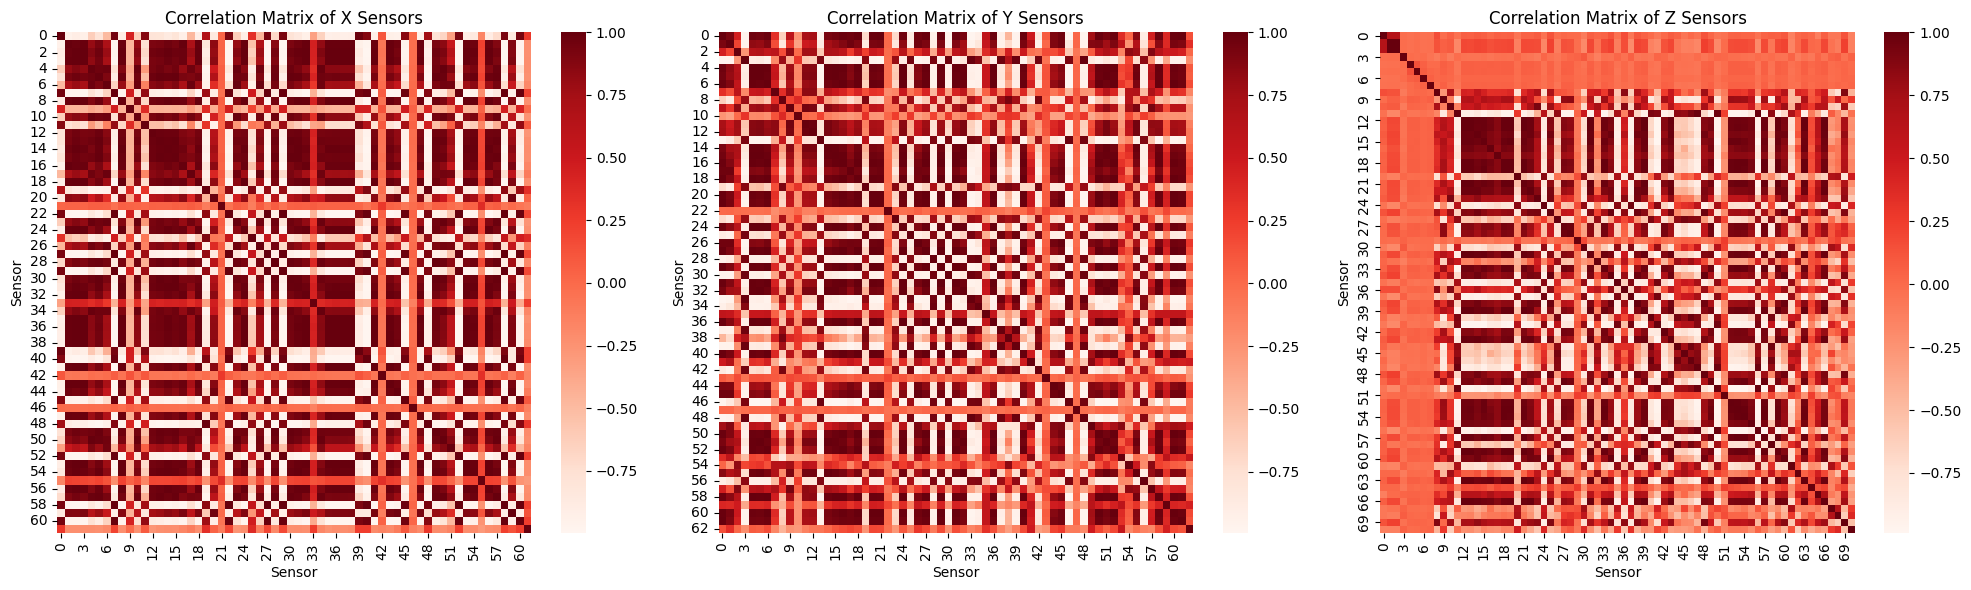

In [202]:
data_thumb = digits_epochs.get_data()[digits_epochs.events[:, 2] == 8]

x_data_thumb = data_thumb[:, x_indices, :]
y_data_thumb = data_thumb[:, y_indices, :]
z_data_thumb = data_thumb[:, z_indices, :]

c_thumb_x, c_thumb_y, c_thumb_z = plot_corr_matrix(
    x_data_thumb, y_data_thumb, z_data_thumb
)

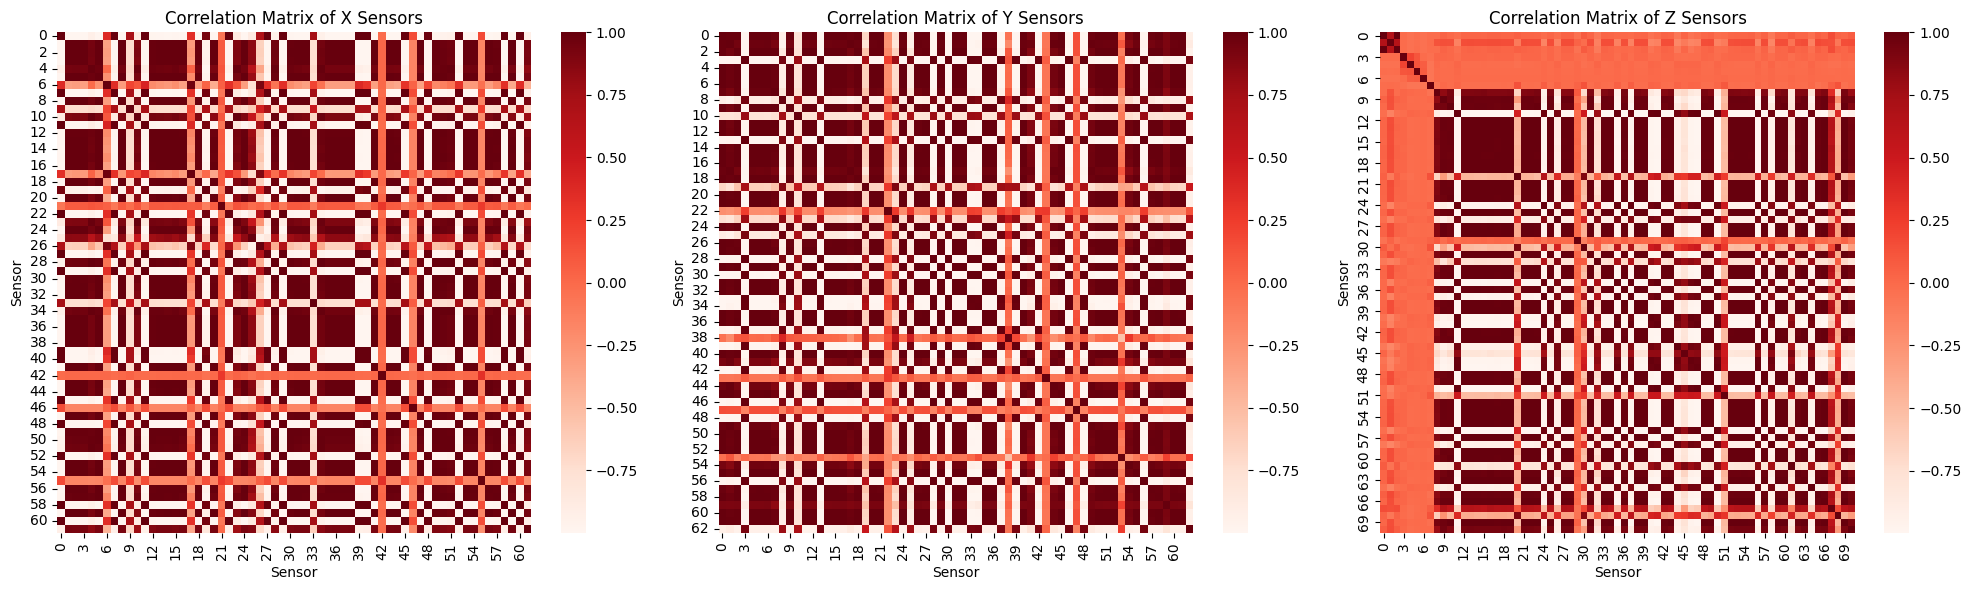

In [184]:
data_pinky = digits_epochs.get_data()[digits_epochs.events[:, 2] == 128]

x_data_pinky = data_pinky[:, x_indices, :]
y_data_pinky = data_pinky[:, y_indices, :]
z_data_pinky = data_pinky[:, z_indices, :]

c_pinky_x, c_pinky_y, c_pinky_z = plot_corr_matrix(
    x_data_pinky, y_data_pinky, z_data_pinky
)

In [185]:
from bct.nbs import nbs_bct

print("x")
nbs_bct(c_thumb_x.T, c_pinky_x.T, k=1000, thresh=0.05, tail="both", paired=True)
print("y")
nbs_bct(c_thumb_y.T, c_pinky_y.T, k=1000, thresh=0.05, tail="both", paired=True)
print("z")
nbs_bct(c_thumb_z.T, c_pinky_z.T, k=1000, thresh=0.05, tail="both", paired=True)

x
max component size is 1829
estimating null distribution with 1000 permutations
permutation 0 of 1000.  p-value so far is 0.000
permutation 100 of 1000.  p-value so far is 0.416
permutation 200 of 1000.  p-value so far is 0.448
permutation 300 of 1000.  p-value so far is 0.458
permutation 400 of 1000.  p-value so far is 0.444
permutation 500 of 1000.  p-value so far is 0.439
permutation 600 of 1000.  p-value so far is 0.461
permutation 700 of 1000.  p-value so far is 0.454
permutation 800 of 1000.  p-value so far is 0.454
permutation 900 of 1000.  p-value so far is 0.456
permutation 999 of 1000.  p-value so far is 0.457
y
max component size is 1902
estimating null distribution with 1000 permutations
permutation 0 of 1000.  p-value so far is 0.000
permutation 100 of 1000.  p-value so far is 0.178
permutation 200 of 1000.  p-value so far is 0.184
permutation 300 of 1000.  p-value so far is 0.216
permutation 400 of 1000.  p-value so far is 0.232
permutation 500 of 1000.  p-value so far i

(array([0.206]),
 array([[0., 0., 1., ..., 1., 1., 1.],
        [0., 0., 1., ..., 1., 1., 1.],
        [1., 1., 0., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 0., 1., 1.],
        [1., 1., 1., ..., 1., 0., 1.],
        [1., 1., 1., ..., 1., 1., 0.]]),
 array([2396., 2392., 2349., 2347., 2393., 2364., 2371., 2337., 2426.,
        2440., 2398., 2419., 2424., 2382., 2416., 2440., 2406., 2348.,
        2406., 2350., 2417., 2376., 2416., 2393., 2424., 2418., 2392.,
        2385., 2377., 2358., 2374., 2388., 2379., 2390., 2418., 2403.,
        2398., 2380., 2330., 2379., 2407., 2404., 2413., 2384., 2403.,
        2388., 2406., 2389., 2364., 2399., 2407., 2414., 2400., 2415.,
        2422., 2371., 2367., 2357., 2425., 2414., 2398., 2395., 2390.,
        2376., 2386., 2344., 2344., 2364., 2382., 2365., 2398., 2388.,
        2355., 2420., 2397., 2397., 2372., 2431., 2378., 2377., 2335.,
        2418., 2388., 2406., 2395., 2446., 2382., 2360., 2394., 2373.,
        2402., 2356., 23

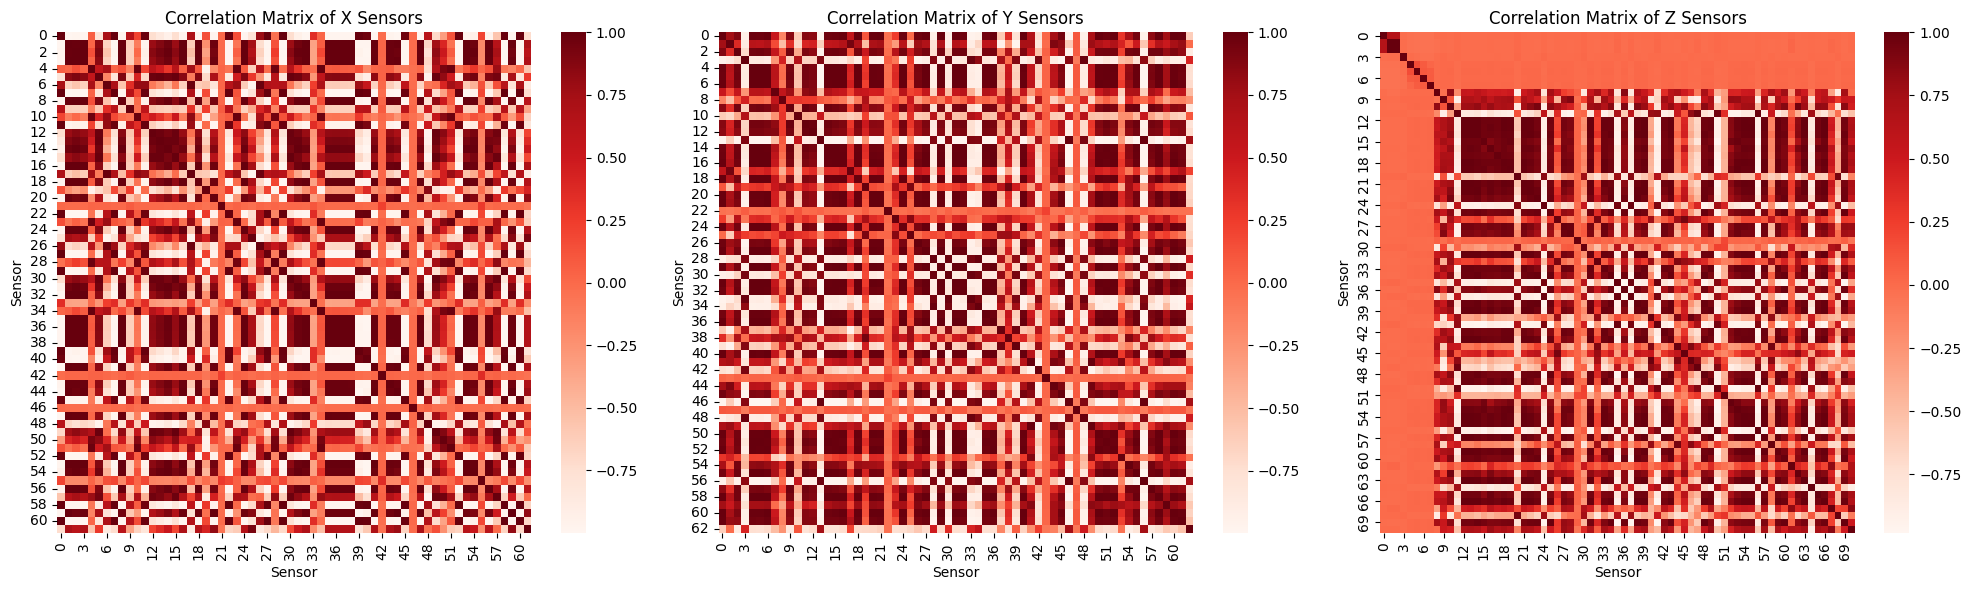

In [186]:
reshaped_data_x = [x_data_thumb.transpose(1, 0, 2).reshape(x_data_thumb.shape[1], -1)]
reshaped_data_y = [y_data_thumb.transpose(1, 0, 2).reshape(y_data_thumb.shape[1], -1)]
reshaped_data_z = [z_data_thumb.transpose(1, 0, 2).reshape(z_data_thumb.shape[1], -1)]
thumb_x, thumb_y, thumb_z = plot_corr_matrix(reshaped_data_x, reshaped_data_y, reshaped_data_z)

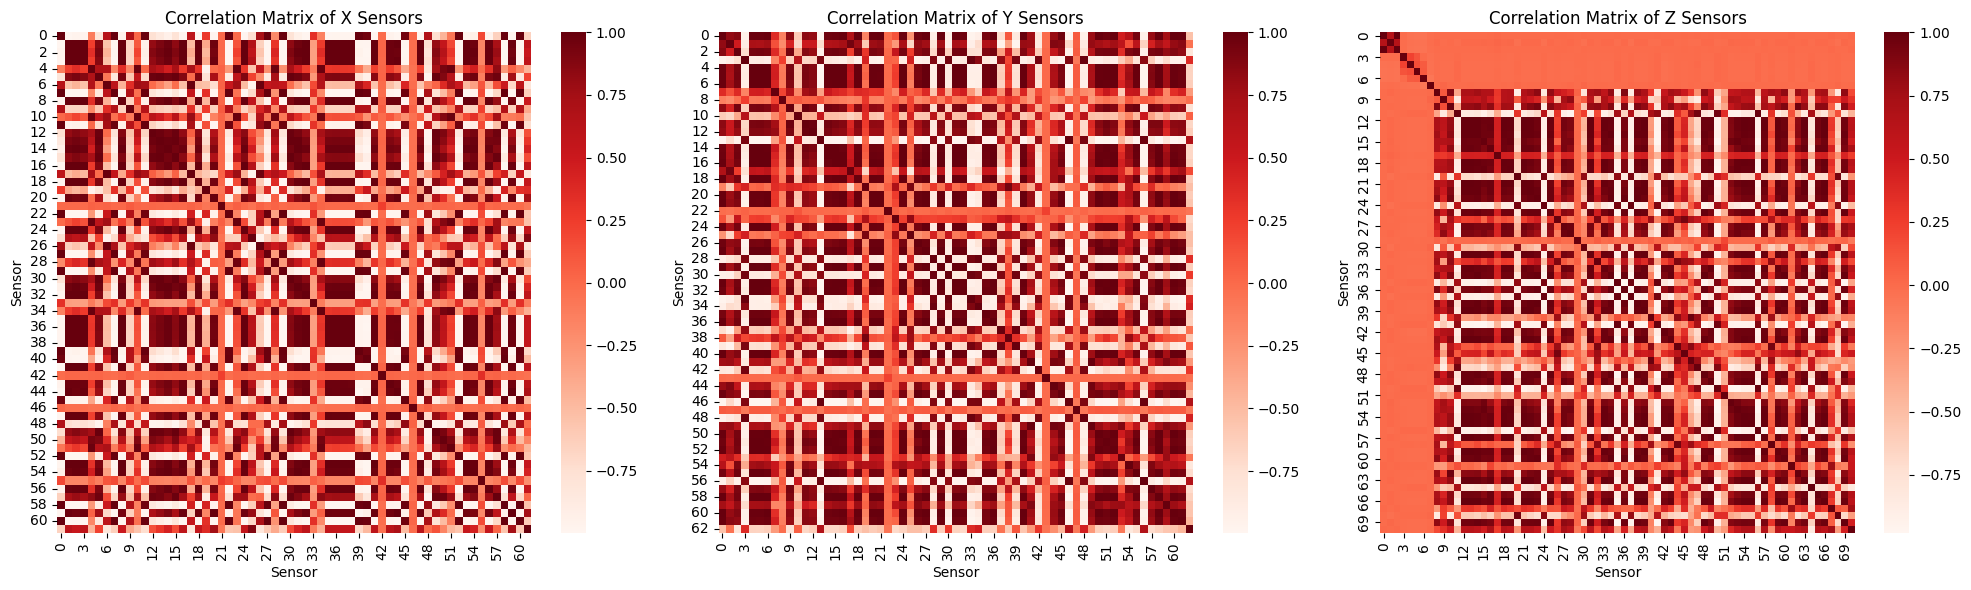

In [187]:
reshaped_data_x = [x_data_pinky.transpose(1, 0, 2).reshape(x_data_pinky.shape[1], -1)]
reshaped_data_y = [y_data_pinky.transpose(1, 0, 2).reshape(y_data_pinky.shape[1], -1)]
reshaped_data_z = [z_data_pinky.transpose(1, 0, 2).reshape(z_data_pinky.shape[1], -1)]
pinky_x, pinky_y, pinky_z = plot_corr_matrix(
    reshaped_data_x, reshaped_data_y, reshaped_data_z
)

### Node level statistics

In [188]:
import bct

thumb_x = c_thumb_x[10]
pinky_x = c_pinky_x[10]

clustering1 = bct.clustering_coef_wu(thumb_x)
clustering5 = bct.clustering_coef_wu(pinky_x)

# t-test between the two groups
from scipy import stats

clust_tstat, clust_pval = stats.ttest_ind(clustering1, clustering5)
print(
    "T-test for clustering coefficient comparison: T-statistic=",
    clust_tstat,
    "p-value =",
    clust_pval,
)


strength_matrix1 = bct.strengths_und(thumb_x)  # For undirected networks
strength_matrix2 = bct.strengths_und(pinky_x)
# Statistical comparison of strengths
t_stat, p_value = stats.ttest_ind(strength_matrix1, strength_matrix2)
print(
    "T-test results strength comparison: T-statistic =", t_stat, ", p-value =", p_value
)

edges_matrix1 = thumb_x.flatten()
edges_matrix2 = pinky_x.flatten()

# Perform a t-test on the flattened matrices
t_stat, p_value = stats.ttest_ind(edges_matrix1, edges_matrix2)

print("T-test results path length: T-statistic =", t_stat, ", p-value =", p_value)

T-test for clustering coefficient comparison: T-statistic= -7.91038481919988 p-value = 1.3112808337712814e-12
T-test results strength comparison: T-statistic = -0.8879034547784052 , p-value = 0.37633985073325726
T-test results path length: T-statistic = -1.8057623913968517 , p-value = 0.07099457034852216


### Comparing halfs

In [220]:
closest_multiple_to_half = int(
    length_epoch * round(data_thumb_flattened.shape[1] / length_epoch / 2)
)
closest_multiple_to_half

187239

In [225]:
data_thumb_flattened = x_data_thumb.transpose(1, 0, 2).reshape(
    x_data_thumb.shape[1], -1
)
length_epoch = x_data_thumb.shape[2]

# Cut the data into 2 groups across dim=1, in multiples of lenth_epoch
closest_multiple_to_half = int(
    length_epoch * round(data_thumb_flattened.shape[1] / length_epoch / 2)
)

# Divide data_thumb_flattened into 2 groups across dim=1
data_thumb_flattened1 = data_thumb_flattened[:, :closest_multiple_to_half]
data_thumb_flattened2 = data_thumb_flattened[:, closest_multiple_to_half:]

t_stat, p_value = stats.ttest_ind(data_thumb_flattened1, data_thumb_flattened2, axis=1)
# Check if there is any p-value below 0.05 and print the corresponding channel
print("Channels with significant differences in power between the two groups:")
print(np.where(p_value < 0.05)[0])

Channels with significant differences in power between the two groups:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61]


## Gestures

In [195]:
file = "/Users/martin.iniguez/Desktop/master-thesis/opm-thesis/data/gestures_epochs/freq_bands/mid_freq_all_epochs.pkl"

gestures_epochs = pickle.load(open(file, "rb"))

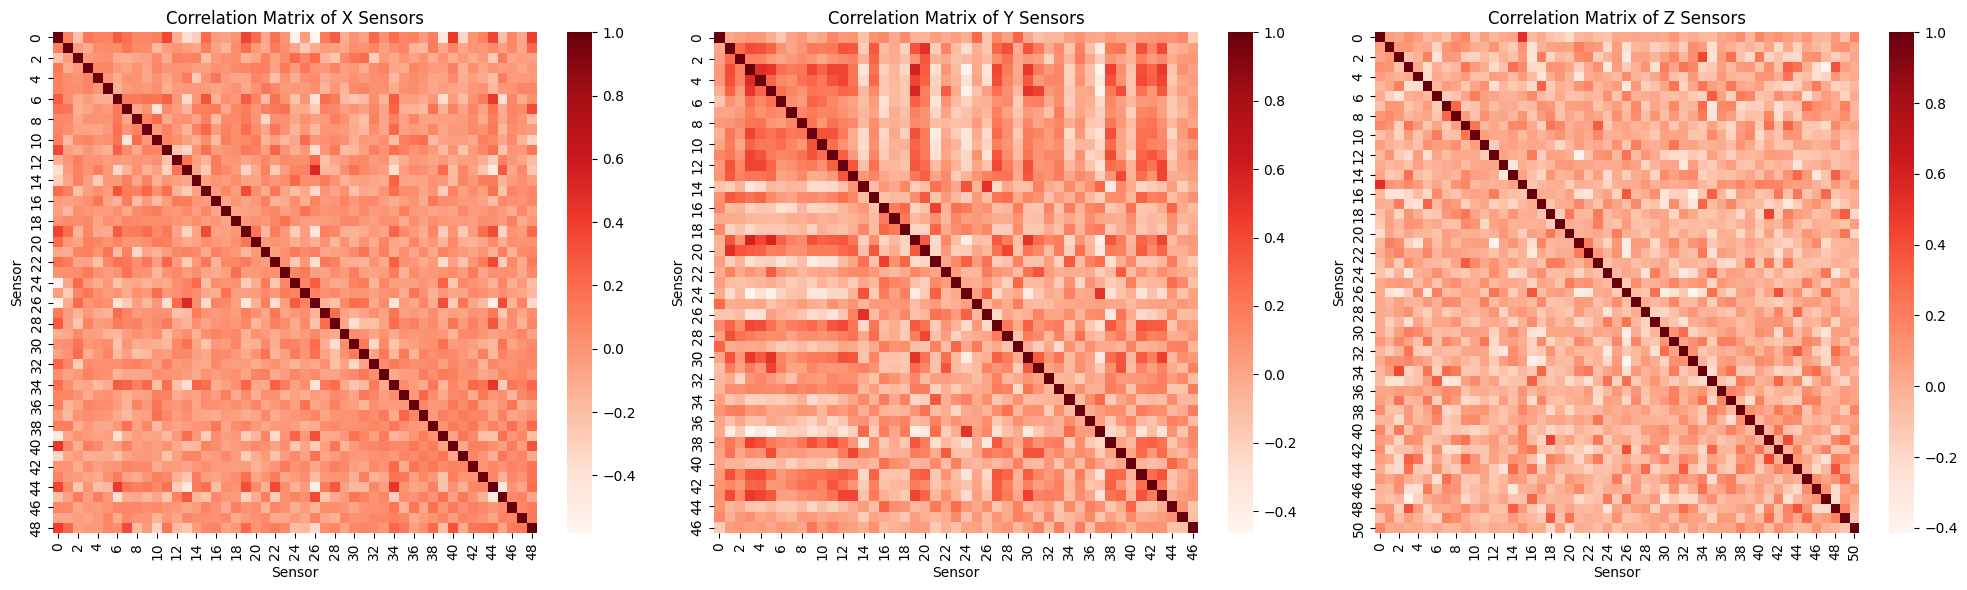

In [190]:
# Assuming 'epochs' is your MNE epochs object
data = gestures_epochs.get_data()
channel_names = gestures_epochs.ch_names

# Replace these with the actual indices for X, Y, Z channels
x_indices = [gestures_epochs.ch_names.index(ch) for ch in channel_names if "[X]" in ch]
y_indices = [gestures_epochs.ch_names.index(ch) for ch in channel_names if "[Y]" in ch]
z_indices = [gestures_epochs.ch_names.index(ch) for ch in channel_names if "[Z]" in ch]

# Separate the data
x_data = data[:, x_indices, :]
y_data = data[:, y_indices, :]
z_data = data[:, z_indices, :]

corr_matrix_x, corr_matrix_y, corr_matrix_z = plot_corr_matrix(x_data, y_data, z_data)

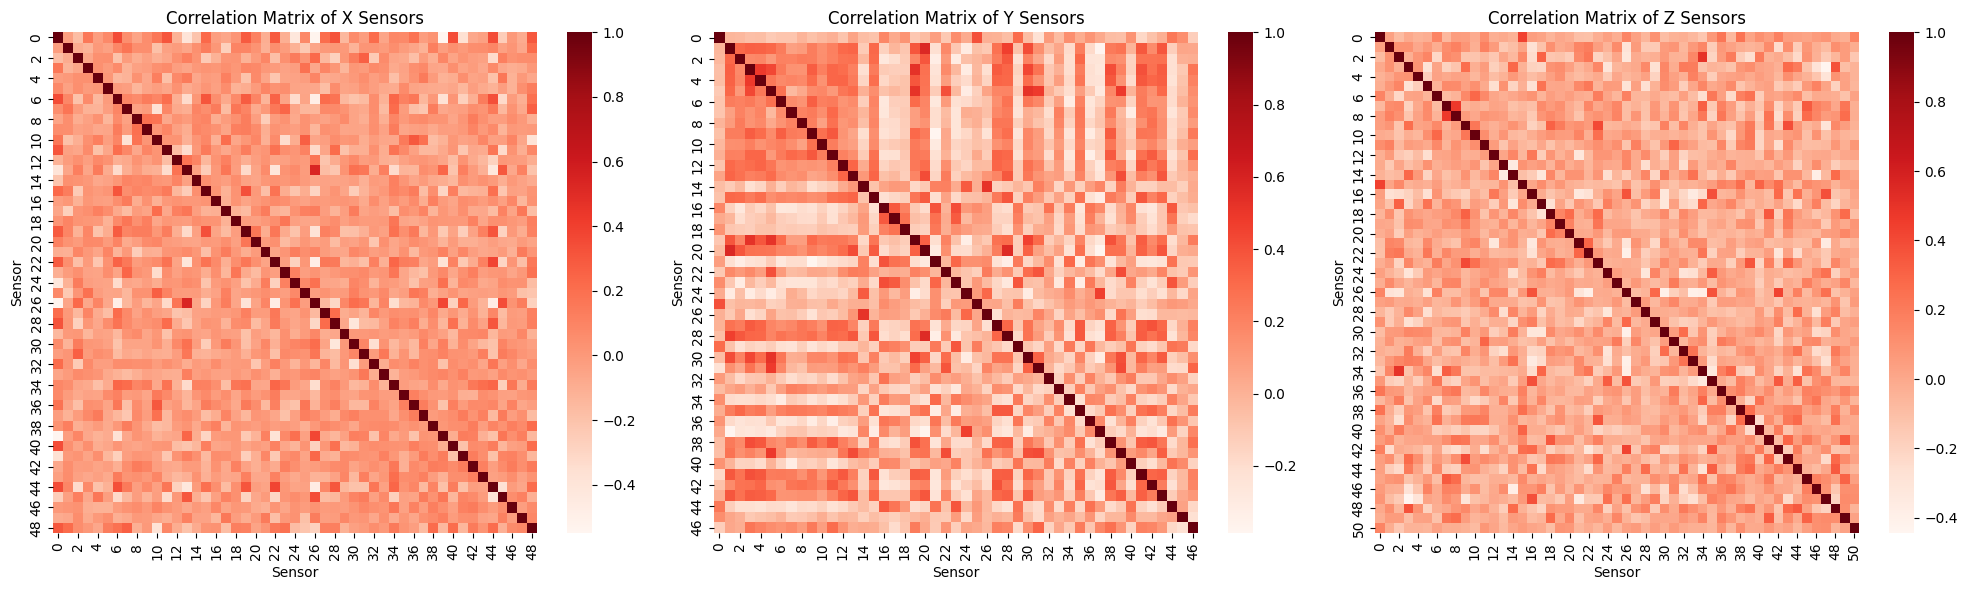

In [191]:
data_rock = gestures_epochs.get_data()[gestures_epochs.events[:, 2] == 1]

x_data_rock = data_rock[:, x_indices, :]
y_data_rock = data_rock[:, y_indices, :]
z_data_rock = data_rock[:, z_indices, :]

c_rock_x, c_rock_y, c_rock_z = plot_corr_matrix(x_data_rock, y_data_rock, z_data_rock)

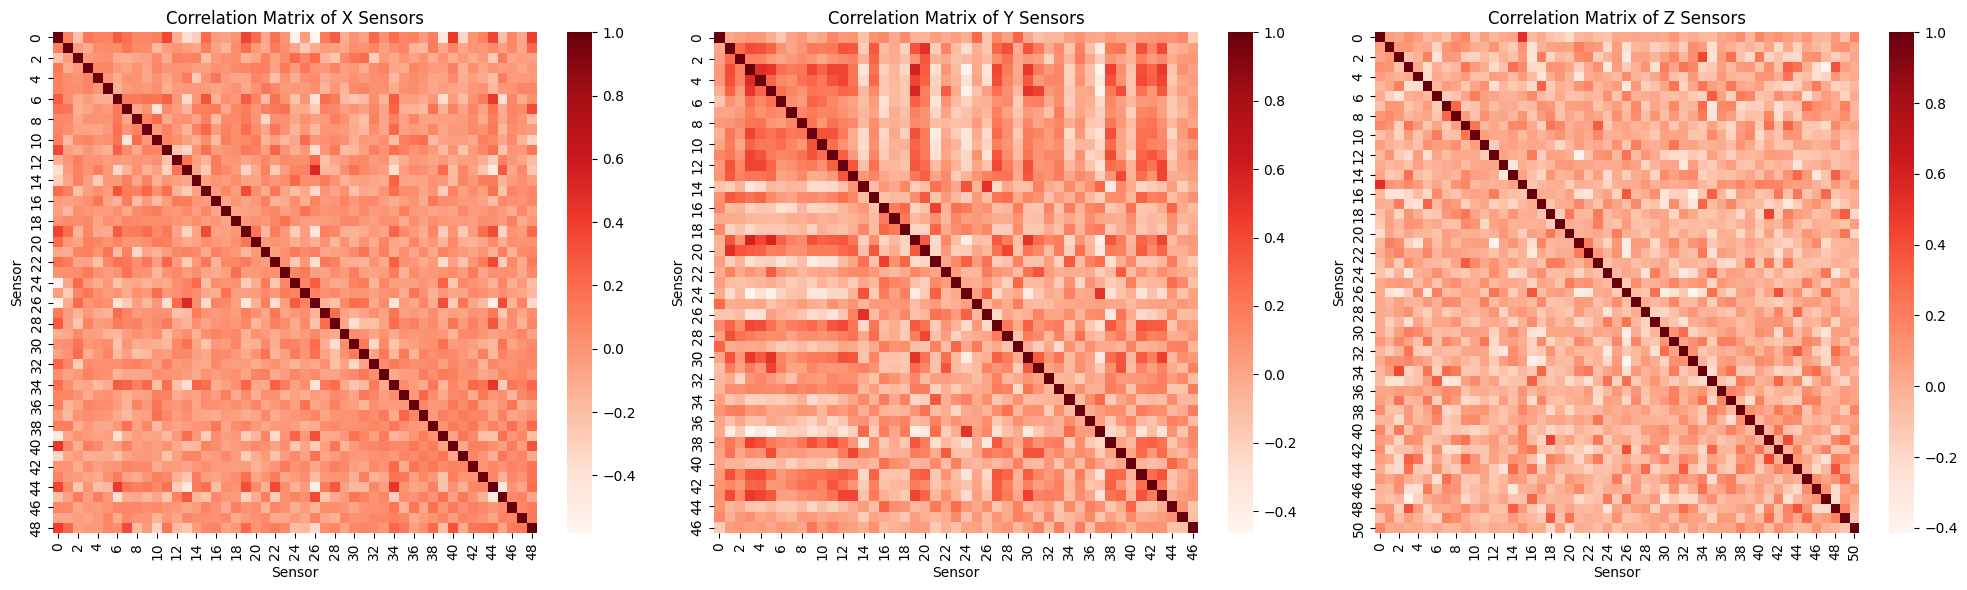

In [192]:
data_scissors = gestures_epochs.get_data()[gestures_epochs.events[:, 2] == 2]

x_data_scissors = data_scissors[:, x_indices, :]
y_data_scissors = data_scissors[:, y_indices, :]
z_data_scissors = data_scissors[:, z_indices, :]

c_scissors_x, c_scissors_y, c_scissors_z = plot_corr_matrix(
    x_data_scissors, y_data_scissors, z_data_scissors
)

In [193]:
print("x")
nbs_bct(c_rock_x.T, c_scissors_x.T, k=1000, thresh=0.05, tail="both", paired=False)
print("y")
nbs_bct(c_rock_y.T, c_scissors_y.T, k=1000, thresh=0.05, tail="both", paired=False)
print("z")
nbs_bct(c_rock_z.T, c_scissors_z.T, k=1000, thresh=0.05, tail="both", paired=False)

x
max component size is 1078
estimating null distribution with 1000 permutations
permutation 0 of 1000.  p-value so far is 1.000
permutation 100 of 1000.  p-value so far is 0.950
permutation 200 of 1000.  p-value so far is 0.970
permutation 300 of 1000.  p-value so far is 0.973
permutation 400 of 1000.  p-value so far is 0.973
permutation 500 of 1000.  p-value so far is 0.972
permutation 600 of 1000.  p-value so far is 0.975
permutation 700 of 1000.  p-value so far is 0.977
permutation 800 of 1000.  p-value so far is 0.980
permutation 900 of 1000.  p-value so far is 0.979
permutation 999 of 1000.  p-value so far is 0.979
y
max component size is 1018
estimating null distribution with 1000 permutations
permutation 0 of 1000.  p-value so far is 1.000
permutation 100 of 1000.  p-value so far is 0.881
permutation 200 of 1000.  p-value so far is 0.846
permutation 300 of 1000.  p-value so far is 0.857
permutation 400 of 1000.  p-value so far is 0.863
permutation 500 of 1000.  p-value so far i

(array([0.91]),
 array([[0., 1., 1., ..., 1., 1., 1.],
        [1., 0., 1., ..., 1., 1., 1.],
        [1., 1., 0., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 0., 1., 1.],
        [1., 1., 1., ..., 1., 0., 1.],
        [1., 1., 1., ..., 1., 1., 0.]]),
 array([1253., 1195., 1189., 1250., 1241., 1187., 1230., 1252., 1263.,
        1210., 1227., 1231., 1231., 1221., 1220., 1249., 1232., 1240.,
        1236., 1255., 1244., 1238., 1204., 1204., 1241., 1193., 1222.,
        1196., 1199., 1220., 1243., 1206., 1208., 1246., 1263., 1195.,
        1206., 1223., 1226., 1191., 1257., 1249., 1200., 1201., 1248.,
        1259., 1223., 1204., 1251., 1231., 1210., 1209., 1232., 1208.,
        1200., 1210., 1211., 1219., 1214., 1191., 1197., 1239., 1220.,
        1198., 1229., 1205., 1253., 1233., 1184., 1201., 1259., 1209.,
        1227., 1254., 1207., 1198., 1213., 1214., 1257., 1250., 1251.,
        1222., 1225., 1200., 1246., 1219., 1232., 1211., 1216., 1240.,
        1203., 1235., 122